<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/CSE3210_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Roll: 2003009**
Date: 05.02.2025

Z-Transformation: y(n) = 2^n . x(n)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

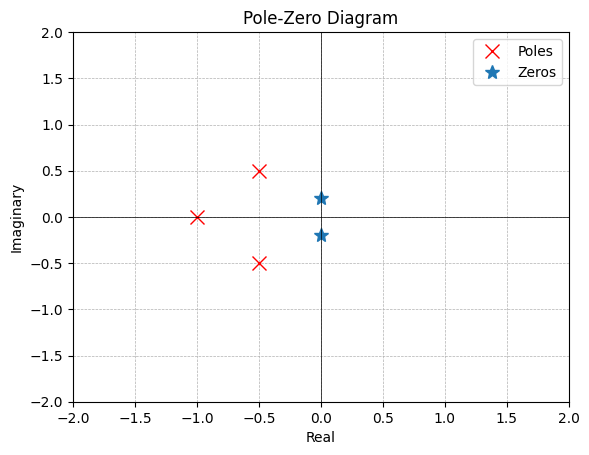

In [ ]:
def plot_pole_zero(poles, zeros):          # poles: A list of complex numbers representing poles. zeros: A list of complex numbers representing zeros.

  fig, ax = plt.subplots()     # fig: The figure (overall canvas). ax: The axes (where the actual plotting happens).

  # Plotting poles
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')     # np.real(poles) extracts the real parts of the poles. np.imag(poles) extracts the imaginary parts of the poles.
                                                                                  # 'rx': 'r' → Red color. 'x' → Cross markers to represent poles.

  # Plotting zeros
  ax.plot(np.real(zeros), np.imag(zeros), '*', markersize=10, label='Zeros')      # '*' → Asterisk/star markers for zeros.

  # Set plotting attributes
  ax.axhline(0, color='black', linewidth=0.5)       # axhline(0) → Draws a horizontal line at y = 0 (x-axis).
  ax.axvline(0, color='black', linewidth=0.5)       # axvline(0) → Draws a vertical line at x = 0 (y-axis).
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)    # True → Grid is turned on. which='both' → Shows gridlines for both major and minor ticks.
                                                                # Dashed lines ('--') with a thin width (0.5).
  ax.legend()     # ax.legend() → Displays the legend (to differentiate poles and zeros).
  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')

  # Plotting  limits
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])             # Limits the x-axis and y-axis to the range -2 to 2. Helps keep the plot focused on the area of interest.

  plt.show()

poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros  =[0.2j, -0.2j]

plot_pole_zero(poles, zeros)

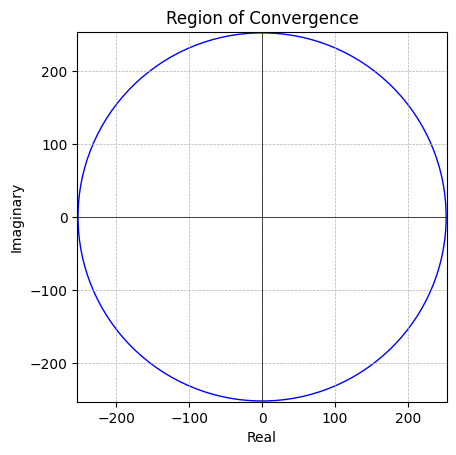

Original signal x(n):
x[0] = 0.0
x[1] = 0.0
x[2] = 1.0
x[3] = 1.0
x[4] = 1.0
x[5] = 1.0
x[6] = 1.0
x[7] = 1.0

Transformed signal y(n) = 2^n * x(n):
y[0] = 0.0
y[1] = 0.0
y[2] = 4.0
y[3] = 8.0
y[4] = 16.0
y[5] = 32.0
y[6] = 64.0
y[7] = 128.0

Z-Transform values:
Z[0]: (252+0j)
Z[1]: (46.22539674441614+167.4802307403552j)
Z[2]: (-52.00000000000004+103.99999999999997j)
Z[3]: (-78.22539674441616+47.48023074035527j)
Z[4]: (-84-7.641796026679483e-14j)
Z[5]: (-78.22539674441619-47.48023074035541j)
Z[6]: (-52.00000000000014-104.00000000000007j)
Z[7]: (46.22539674441657-167.4802307403549j)

ROC: |Z| > 252.0


In [ ]:


def generate_signal(N):
    # Generate signal x(n) = {0,0,1,1,1,1,...}

    signal = np.zeros(N)
    signal[2:] = 1  # Set all elements from index 2 with 1
    return signal

def transform_signal(signal):
    # Apply transformation y(n) = 2^n * x(n)

    n = np.arange(len(signal))
    return (2**n) * signal

def Z_Transformation(signal, n):
    N = len(signal)
    Z = np.zeros(N, dtype=complex)

    for k in range(N):
        Z[k] = np.sum(signal * np.exp(-1j*2*np.pi*n*k/N))

    roc = 'Entire Z-Plane'
    if np.abs(Z).any():
        roc = 'ROC: |Z| > {}'.format(np.max(np.abs(Z)))

    return Z, roc

def plot_roc(Z):
    fig, ax = plt.subplots()
    circle = plt.Circle((0,0), radius=np.max(np.abs(Z)), edgecolor='b', fill=False)
    ax.add_patch(circle)
    plt.xlim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1)
    plt.ylim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1)

    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Region of Convergence')
    plt.grid(True, linestyle='--', linewidth=0.5)
    ax.set_aspect('equal')
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    plt.show()

# Main execution
N = 8  # Length of the sequence
n = np.arange(N)

# Generate original signal x(n)
x = generate_signal(N)

# Apply transformation to get y(n)
y = transform_signal(x)

# Compute Z-transform of y(n)
Z, roc = Z_Transformation(y, n)

plot_roc(Z)

print('Original signal x(n):')
for i, val in enumerate(x):
    print(f'x[{i}] = {val}')

print('\nTransformed signal y(n) = 2^n * x(n):')
for i, val in enumerate(y):
    print(f'y[{i}] = {val}')

print('\nZ-Transform values:')
for i, z in enumerate(Z):
    print(f'Z[{i}]: {z}')

print(f'\n{roc}')